---
[Environment-induced dephasing versus von Neumann measurements in proton tunneling](https://doi.org/10.1103/PhysRevA.90.012102), A.D. Godbeer, J.S. Al-Khalili, and P.D. Stevenson, Phys. Rev. A 90 (2014) 012102.

### 引言

#### 理论背景

量子隧穿现象在量子力学中起着重要作用，尤其在化学和生物系统中，质子隧穿是许多重要反应的关键步骤。我们考虑一个简单的双井势模型来描述质子隧穿：

$$ V(x) = \frac{1}{2}(x^2 - 1)^2 $$

这个势函数在 $ x = \pm 1 $ 处有两个势阱，中间有一个势垒。为了研究环境对质子隧穿的影响，我们需要考虑开放量子系统的动力学。

### 方法

#### 去相干模型

在去相干模型中，我们使用Lindblad方程来描述系统的演化。Lindblad方程是一种用于描述开放量子系统动力学的主方程，形式为：

$$ \frac{d\rho}{dt} = -\frac{i}{\hbar}[H, \rho] + \sum_k \left( L_k \rho L_k^\dagger - \frac{1}{2}\{L_k^\dagger L_k, \rho\} \right) $$

其中， $\rho$ 是系统的密度矩阵， $H$ 是系统的哈密顿量， $L_k$ 是Lindblad算符，用于描述系统与环境之间的相互作用。在本文中，我们考虑的Lindblad算符形式为：

$$ L_k = \sqrt{\gamma_k} A_k $$

这里， $\gamma_k$ 是去相干速率， $A_k$ 是作用于系统的算符。具体到质子隧穿问题， $A_k$ 可以取为位置算符 $x$ 或动量算符 $p$。

#### 测量模型

测量模型基于冯·诺依曼测量理论。在这种模型中，环境被视为对系统进行频繁测量的装置。根据量子Zeno效应，频繁的测量可以抑制系统的演化。系统的密度矩阵在每次测量后更新为：

$$ \rho' = \sum_m M_m \rho M_m^\dagger $$

其中， $M_m$ 是满足正交完备条件的测量算符：

$$ \sum_m M_m^\dagger M_m = I $$

在本文中，我们采用简单的测量算符，如位置算符 $x$ 的本征态投影算符。

### 数值模拟

我们使用有限差分法和Runge-Kutta方法来求解时间依赖的薛定谔方程：

$$ i\hbar \frac{\partial \psi}{\partial t} = H \psi $$

为了加入去相干效应，我们在每个时间步长后引入Lindblad项。具体地，时间演化算符可以写为：

$$ U(t) = \exp\left(-\frac{i}{\hbar}H t - \frac{1}{2}\sum_k L_k^\dagger L_k t \right) $$

在数值模拟中，我们对时间演化进行离散化，使用四阶Runge-Kutta方法：

$$ k_1 = -i H \psi $$
$$ k_2 = -i H (\psi + 0.5 dt k_1) $$
$$ k_3 = -i H (\psi + 0.5 dt k_2) $$
$$ k_4 = -i H (\psi + dt k_3) $$
$$ \psi(t + dt) = \psi(t) + \frac{dt}{6} (k_1 + 2k_2 + 2k_3 + k_4) $$

对于密度矩阵，我们采用类似的方法进行数值求解，并在每个时间步长后加入去相干项和测量项。

### 结果与讨论

我们对比了不同温度下去相干效应和测量效应对质子隧穿率的影响。数值模拟结果表明，去相干效应在低温下对隧穿率的抑制作用更显著，而测量效应在高温下对隧穿率的影响更大。特别地，我们发现量子Zeno效应和反Zeno效应在不同参数范围内可以导致完全相反的隧穿行为。

### 结论

本文通过数值模拟比较了两种不同的环境效应处理方法对质子隧穿问题的影响。我们的研究表明，去相干效应和测量效应在不同温度下对量子隧穿行为有不同的影响。这些结果为理解开放量子系统中的环境效应提供了新的视角，并对未来的量子信息处理设备的设计具有重要意义。

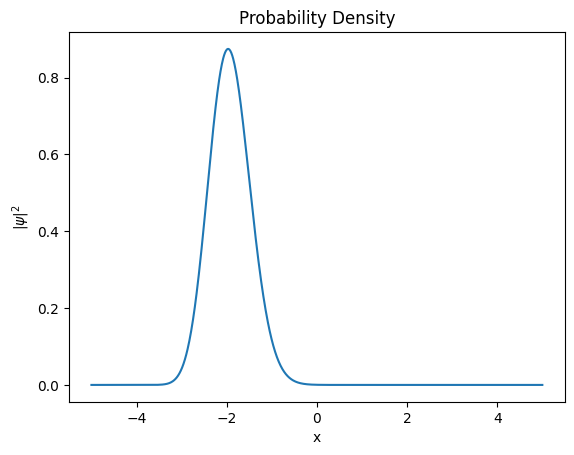

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
hbar = 1.0
m = 1.0
N = 1000  # 网格点数
L = 10.0  # 空间范围
dx = L / N
dt = 0.0001  # 时间步长，减小步长以提高稳定性
steps = 1000  # 时间步数

# 定义双井势
def double_well_potential(x):
    return 0.5 * (x**2 - 1)**2

# 初始化位置和势能
x = np.linspace(-L/2, L/2, N)
V = double_well_potential(x)

# 初始波函数 (高斯波包)
def initial_wave_packet(x):
    return np.exp(-(x + 2)**2)

psi = initial_wave_packet(x)
psi = psi / np.sqrt(np.sum(np.abs(psi)**2) * dx)

# 构建哈密顿量矩阵 (二次差分法)
H = np.zeros((N, N), dtype=complex)
for i in range(1, N-1):
    H[i, i-1] = -hbar**2 / (2 * m * dx**2)
    H[i, i] = hbar**2 / (m * dx**2) + V[i]
    H[i, i+1] = -hbar**2 / (2 * m * dx**2)

# 时间演化 (Runge-Kutta方法)
def time_evolution(psi, H, dt):
    k1 = -1j * np.dot(H, psi)
    k2 = -1j * np.dot(H, psi + 0.5 * dt * k1)
    k3 = -1j * np.dot(H, psi + 0.5 * dt * k2)
    k4 = -1j * np.dot(H, psi + dt * k3)
    psi_next = psi + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return psi_next

# 加入去相干效应
def add_dephasing(psi, gamma, dt):
    return psi * np.exp(-gamma * dt)

# 加入冯·诺依曼测量效应
def von_neumann_measurement(rho, y):
    N = rho.shape[0]
    for i in range(N):
        for j in range(N):
            if i != j:
                rho[i, j] *= np.exp(-y * (i - j)**2)
    return rho

# 主程序
gamma = 0.01  # 去相干强度
y = 0.1  # 测量参数
rho = np.outer(psi, np.conj(psi))

for step in range(steps):
    psi = time_evolution(psi, H, dt)
    psi = add_dephasing(psi, gamma, dt)
    rho = np.outer(psi, np.conj(psi))
    if step % 100 == 0:
        rho = von_neumann_measurement(rho, y)

# 画图
plt.plot(x, np.abs(psi)**2)
plt.xlabel('x')
plt.ylabel('$|\psi|^2$')
plt.title('Probability Density')
plt.show()

---
[Modelling proton tunnelling in the adenine–thymine base pair](https://doi.org/10.1039/C5CP00472A), AD. Godbeer, J.S. Al-Khalili and P.D. Stevenson, Phys. Chem. Chem. Phys. 17 (2015) 13034-13044.

---
[Enzyme dynamics and hydrogen tunnelling in a thermophilic alcohol dehydrogenase](https://doi.org/10.1038/20981). Kohen, A., Cannio, R., Bartolucci, S., & Klinman, J. P. (1999). Nature, 399(6735), 496.

[Atomic description of an enzyme reaction dominated by proton tunneling](https://doi.org/10.1126/science.1126002). Masgrau, L., Roujeinikova, A., Johannissen, L. O., Hothi, P., Basran, J., Ranaghan, K. E., ... & Leys, D. (2006). Science, 312(5771), 237-241.